# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Чтобы была возможность воспроизвести мой результат, а не другой на новых сгенерированных значениях

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [29]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [4]:
pip install pandas ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ea6d73e893141639357f3170a76e661a2bedc999366f5b5d408b9c6ac8c9e39a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [30]:
from ydata_profiling import ProfileReport

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [32]:
missing_cols = df_train.columns[df_train.isnull().any()].tolist()
missing_cols

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [33]:
duplicates = df_train.duplicated().sum()
duplicates

985

In [34]:
profile = ProfileReport(
    df_train,
    title="Dataframe Profiling Report"
)

In [70]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Выводы


Больше всего пропусков в столбце torque.

Как и ожидалось сущесвует сильная отрицательная корелляция между ценой и пробегом, а также между годом выпуска и пробегом. Тут без приколов. Также в таблице собраны в основном продажи частных продавцов, а не диллеров, что(наверно) лучше помогает оценить рыночные цены. Несмотря на это преобладает категория first owner.

Не знаю, что еще написать, там сверху все красиво

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

### По числовым

In [35]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [36]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

### По категориальным

In [37]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [38]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

### Выводы

Медианы на трейне и тесте примерно равны, что говорит может говорить о том, что данные разбиты хорошо и датасеты похожи, то есть модель может показать хорошее качество

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [39]:
features = df_train.drop(columns=['selling_price'])
duplicates = features.duplicated(keep='first')
duplicate_rows = features[duplicates]
len(duplicate_rows)

1159

In [40]:
duplicate_groups = features[features.duplicated(keep=False)].groupby(list(features.columns))
duplicate_groups.value_counts()

name                                             year  km_driven  fuel    seller_type  transmission  owner         mileage     engine   max_power   torque               seats
Audi Q3 2.0 TDI Quattro Premium Plus             2017  22000      Diesel  Dealer       Automatic     First Owner   15.73 kmpl  1968 CC  174.33 bhp  380Nm@ 1750-2500rpm  5.0       2
Audi Q5 3.0 TDI Quattro                          2014  76131      Diesel  Individual   Automatic     First Owner   13.22 kmpl  2967 CC  241.4 bhp   580Nm@ 1400-3250rpm  5.0       2
Audi Q5 35TDI Premium Plus                       2018  31800      Diesel  Dealer       Automatic     First Owner   17.01 kmpl  1968 CC  188 bhp     400nm@ 1750-3000rpm  5.0       6
BMW 3 Series 320d Luxury Line                    2012  140000     Diesel  Individual   Automatic     Second Owner  18.88 kmpl  1995 CC  184 bhp     380Nm@ 1750-2750rpm  5.0       2
BMW 3 Series 320d Luxury Line Plus               2017  44000      Diesel  Dealer       Automatic     First Owner   22.69 kmpl  1995 CC  190 bhp     400Nm@ 1750-2750rpm  5.0       2
                                                                                                                                                                                  ..
Volkswagen Polo 2015-2019 1.5 TDI Highline Plus  2018  40000      Diesel  Dealer       Manual        First Owner   20.14 kmpl  1498 CC  88 bhp      230Nm@ 1500-2500rpm  5.0       2
Volkswagen Vento 1.5 TDI Highline AT             2016  60000      Diesel  Individual   Automatic     First Owner   22.15 kmpl  1498 CC  108.6 bhp   250Nm@ 1500-3000rpm  5.0       2
Volkswagen Vento Diesel Highline                 2012  90000      Diesel  Individual   Manual        First Owner   20.54 kmpl  1598 CC  103.6 bhp   250Nm@ 1500-2500rpm  5.0       3
Volvo V40 D3 R-Design                            2018  2000       Diesel  Dealer       Automatic     First Owner   16.8 kmpl   1984 CC  150 bhp     350Nm@ 1500-2750rpm  5.0      23
Volvo XC40 D4 Inscription BSIV                   2019  20000      Diesel  Individual   Automatic     First Owner   18.0 kmpl   1969 CC  190 bhp     400Nm                5.0      26
Name: count, Length: 624, dtype: int64

In [41]:
feature_columns = [col for col in df_train.columns if col != 'selling_price']
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')

In [42]:
assert df_train.shape == (5840, 13)

In [43]:
df_train.reset_index(drop=True)

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [44]:
import re

In [45]:
df_train['mileage'] = df_train['mileage'].str.extract('(\d+\.?\d*)').astype(float)
df_train['engine'] = df_train['engine'].str.extract('(\d+)').astype(float)
df_train['max_power'] = df_train['max_power'].str.extract('(\d+\.?\d*)').astype(float)

df_test['mileage'] = df_test['mileage'].str.extract('(\d+\.?\d*)').astype(float)
df_test['engine'] = df_test['engine'].str.extract('(\d+)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract('(\d+\.?\d*)').astype(float)

<ipython-input-45-b0023c0a0232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mileage'] = df_train['mileage'].str.extract('(\d+\.?\d*)').astype(float)
<ipython-input-45-b0023c0a0232>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['engine'] = df_train['engine'].str.extract('(\d+)').astype(float)
<ipython-input-45-b0023c0a0232>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [46]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
6992  Petrol  Individual       Manual           First Owner    17.92  1086.0   
6993  Petrol  Individual       Manual          Second Owner    18.90   998.0   
6994  Petrol  Individual       Manual           First Owner    18.50  1197.0   
6995  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
6996  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm    5.0  
1        103.52        250Nm@ 1500-2500rpm    5.0  
2         90.00   22.4 kgm at 1750-2750rpm    5.0  
3         88.20      11.5@ 4,500(kgm@ rpm)    5.0  
4         81.86          113.75nm@ 4000rpm    5.0  
...         ...                        ...    ...  
6992      62.10            96.1Nm@ 3000rpm    5.0  
6993      67.10              90Nm@ 3500rpm    5.0  
6994      82.85           113.7Nm@ 4000rpm    5.0  
6995     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996      73.90             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [47]:
def split_torque(torque_str):
    if pd.isna(torque_str):
        return pd.NA, pd.NA

    torque_str = torque_str.replace(',', '')
    torque_match = re.search(r'(\d+\.?\d*)', torque_str)
    rpm_match = re.search(r'@\s*(\d+\.?\d*)', torque_str)

    torque = float(torque_match.group(1)) if torque_match else pd.NA
    rpm = float(rpm_match.group(1)) if rpm_match else pd.NA

    if 'kgm' in torque_str.lower():
        torque = torque * 9.80665

    return torque, rpm


In [48]:
df_train[['torque', 'max_torque_rpm']] = pd.DataFrame(
    df_train['torque'].apply(split_torque).tolist(),
    index=df_train.index
)

<ipython-input-48-be24488ecaa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['torque', 'max_torque_rpm']] = pd.DataFrame(
<ipython-input-48-be24488ecaa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['torque', 'max_torque_rpm']] = pd.DataFrame(


In [49]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

       torque  seats max_torque_rpm  
0       190.0    5.0         2000.0  
1       250.0    5.0         1500.0  
2   219.66896    5.0           <NA>  
3  112.776475    5.0         4500.0  
4      113.75    5.0         4000.0

In [50]:
df_test[['torque', 'max_torque_rpm']] = pd.DataFrame(
    df_test['torque'].apply(split_torque).tolist(),
    index=df_test.index
)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [57]:
columns = ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

df_train[columns] = df_train[columns].fillna(df_train[columns].median())
df_test[columns] = df_test[columns].fillna(df_test[columns].median())

assert df_train[columns].isna().sum().sum() == 0
assert df_test[columns].isna().sum().sum() == 0

<ipython-input-57-570648d0695b>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train[columns] = df_train[columns].fillna(df_train[columns].median())
<ipython-input-57-570648d0695b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[columns] = df_train[columns].fillna(df_train[columns].median())
<ipython-input-57-570648d0695b>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the futu

### Ответ

Медиану стоит применять так как устойчива к выбросам и не искажает распределение данных

Медиану надо считать по тренировочным данным для обоих датасетов, так как нельзя допустить утечки данных из теста


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [52]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

<ipython-input-52-24a1e949dc05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['engine'] = df_train['engine'].astype(int)
<ipython-input-52-24a1e949dc05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['seats'] = df_train['seats'].astype(int)


Потому что существует небольшое количество возможных значений переменной seats

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [58]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.930478     5.426712     2647.652911  
std      31.640418   116.757608     0.982344     1101.733822  
min       0.000000    47.071920     2.000000      175.000000  
25%      68.000000   111.800000     5.000000     1750.000000  
50%      81.860000   160.000000     5.000000     2000.000000  
75%      99.000000   200.055660     5.000000     3500.000000  
max     400.000000  3726.527000    14.000000    21800.000000

In [59]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

Выше писал, что распределения не должны были поменяться. + доля пропусков была не слишком большой

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1200x1000 with 0 Axes>

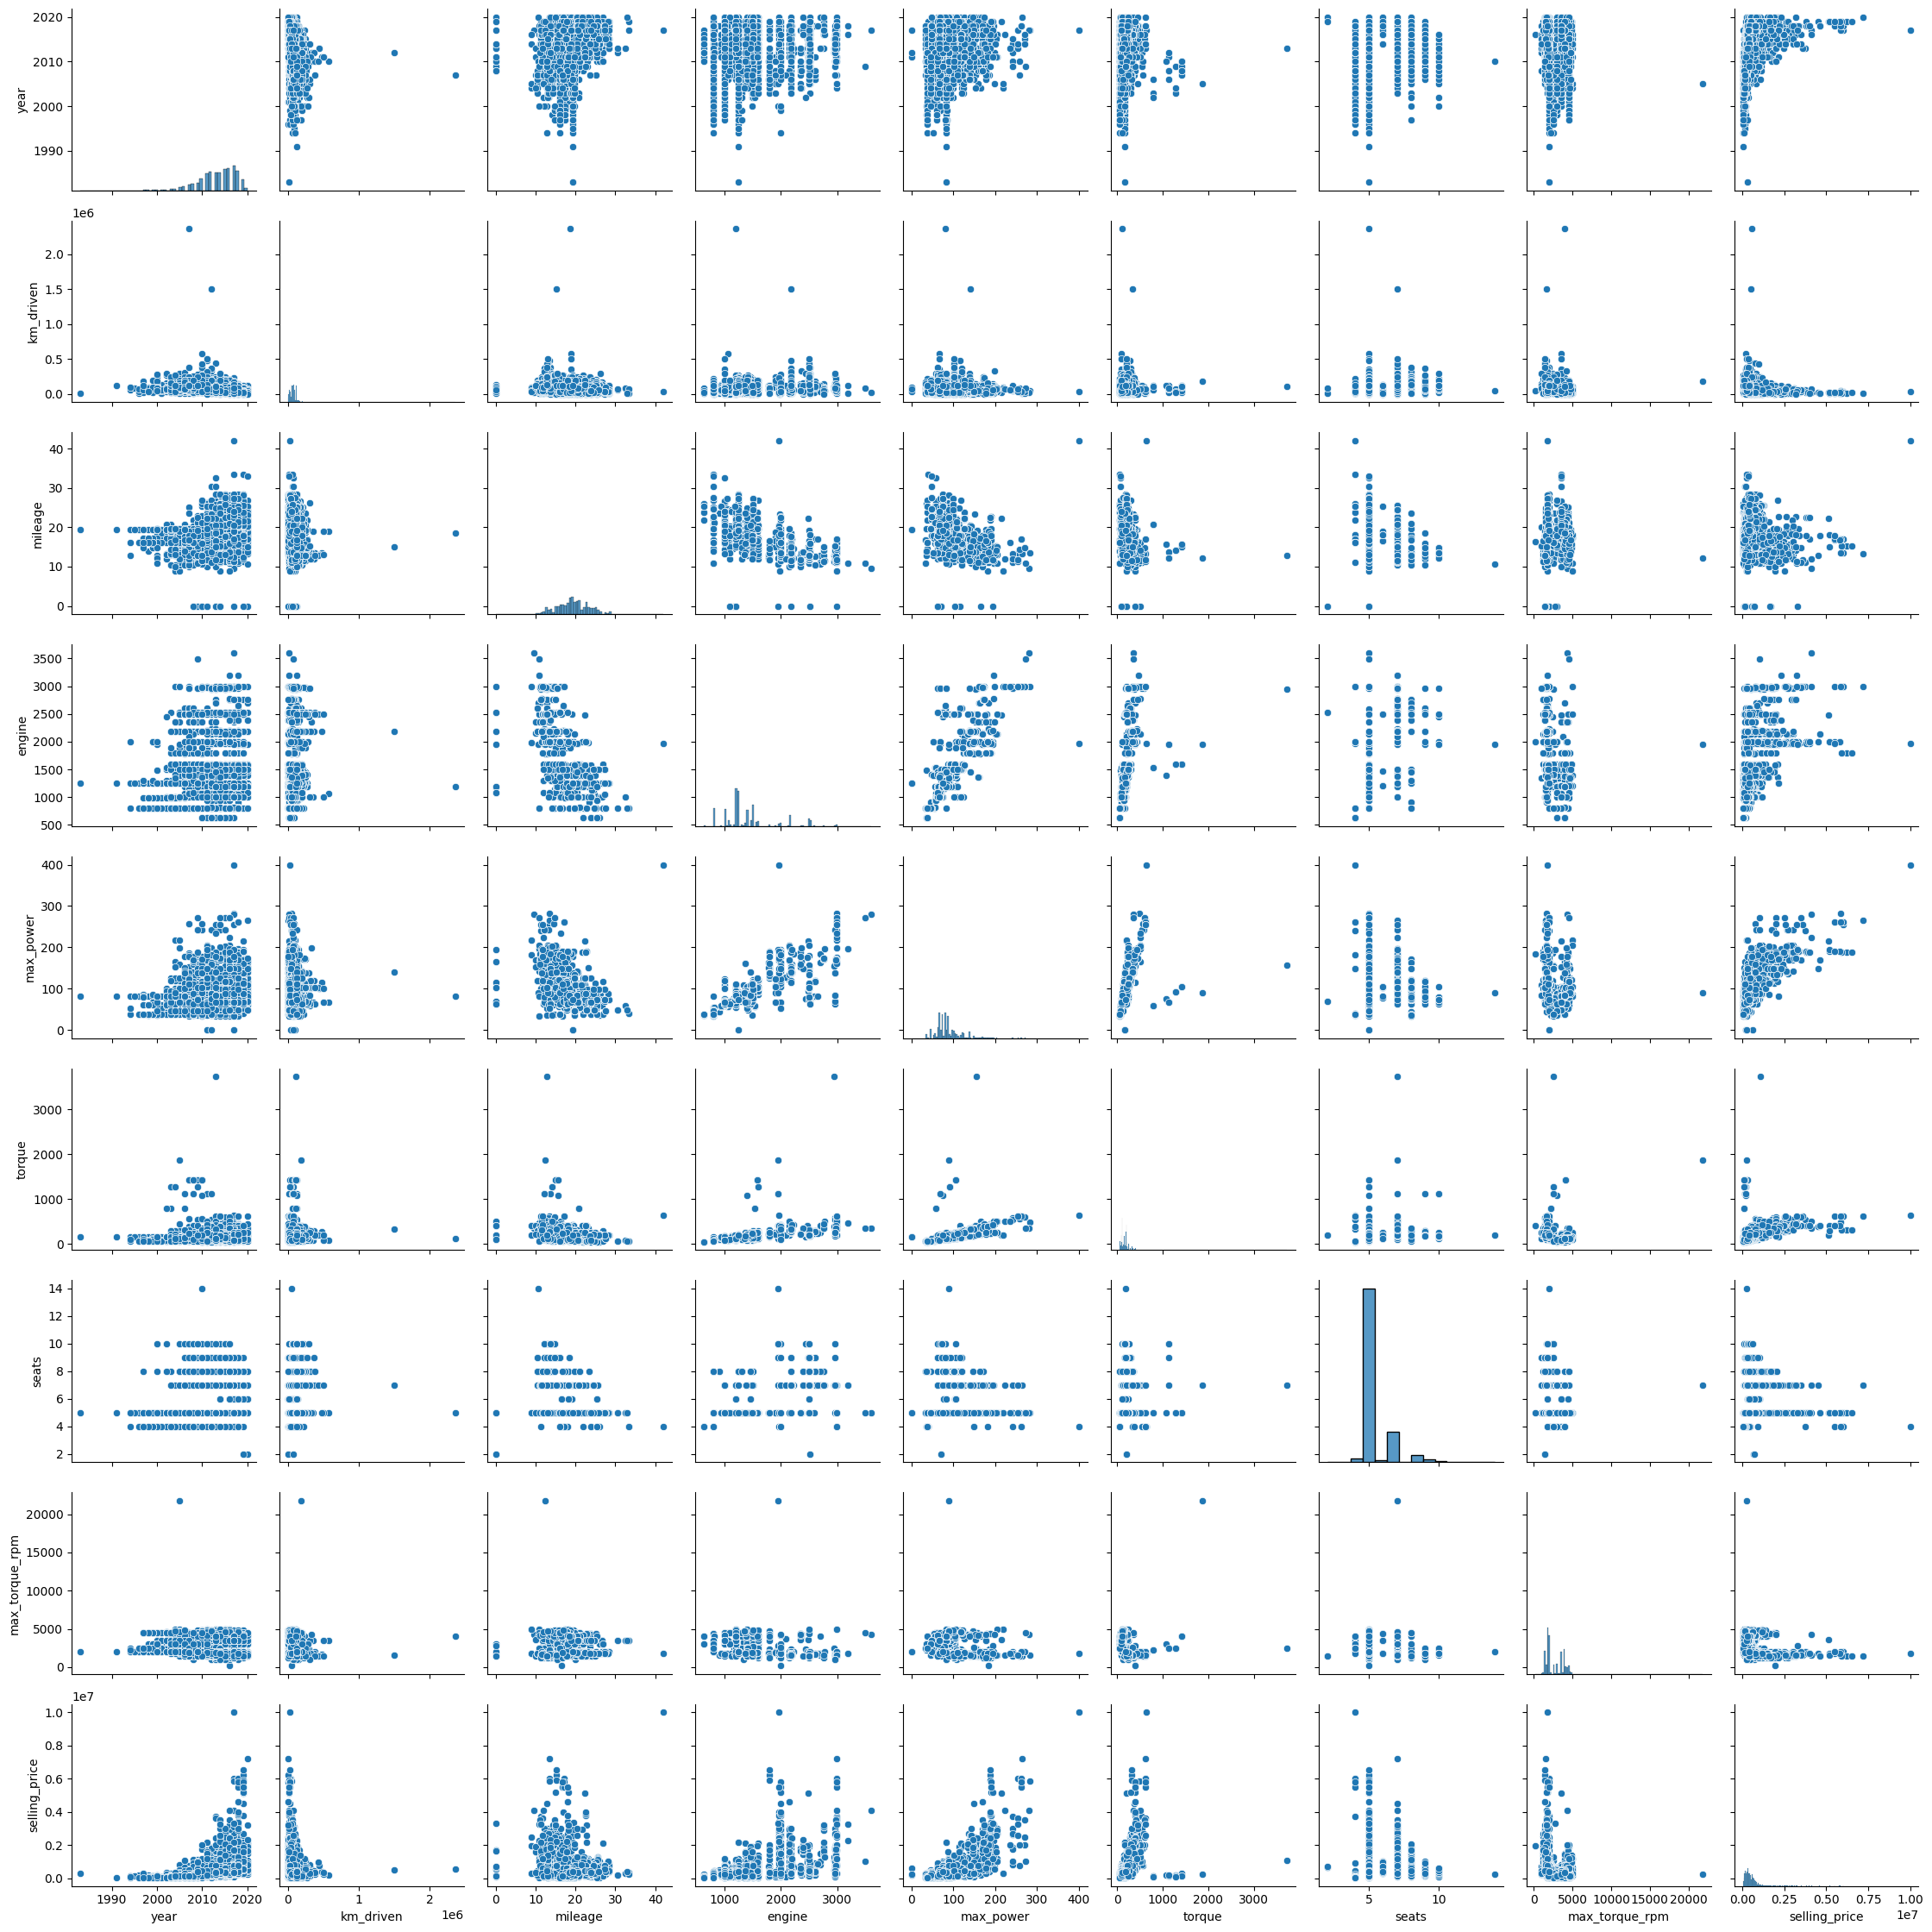

In [64]:
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm', 'selling_price']

plt.figure(figsize=(12, 10))
sns.pairplot(df_train[numeric_columns])
plt.tight_layout()
plt.show()

Можно увидеть связь. Чем новые машина - тем дороже, чем больше пробег - тем дешевле. Чем больше значение max_power и engine - тем дороже. Искать корелляции межлу признаками тяжело. Лучше вглянуть на дашборд)


<Figure size 1200x1000 with 0 Axes>

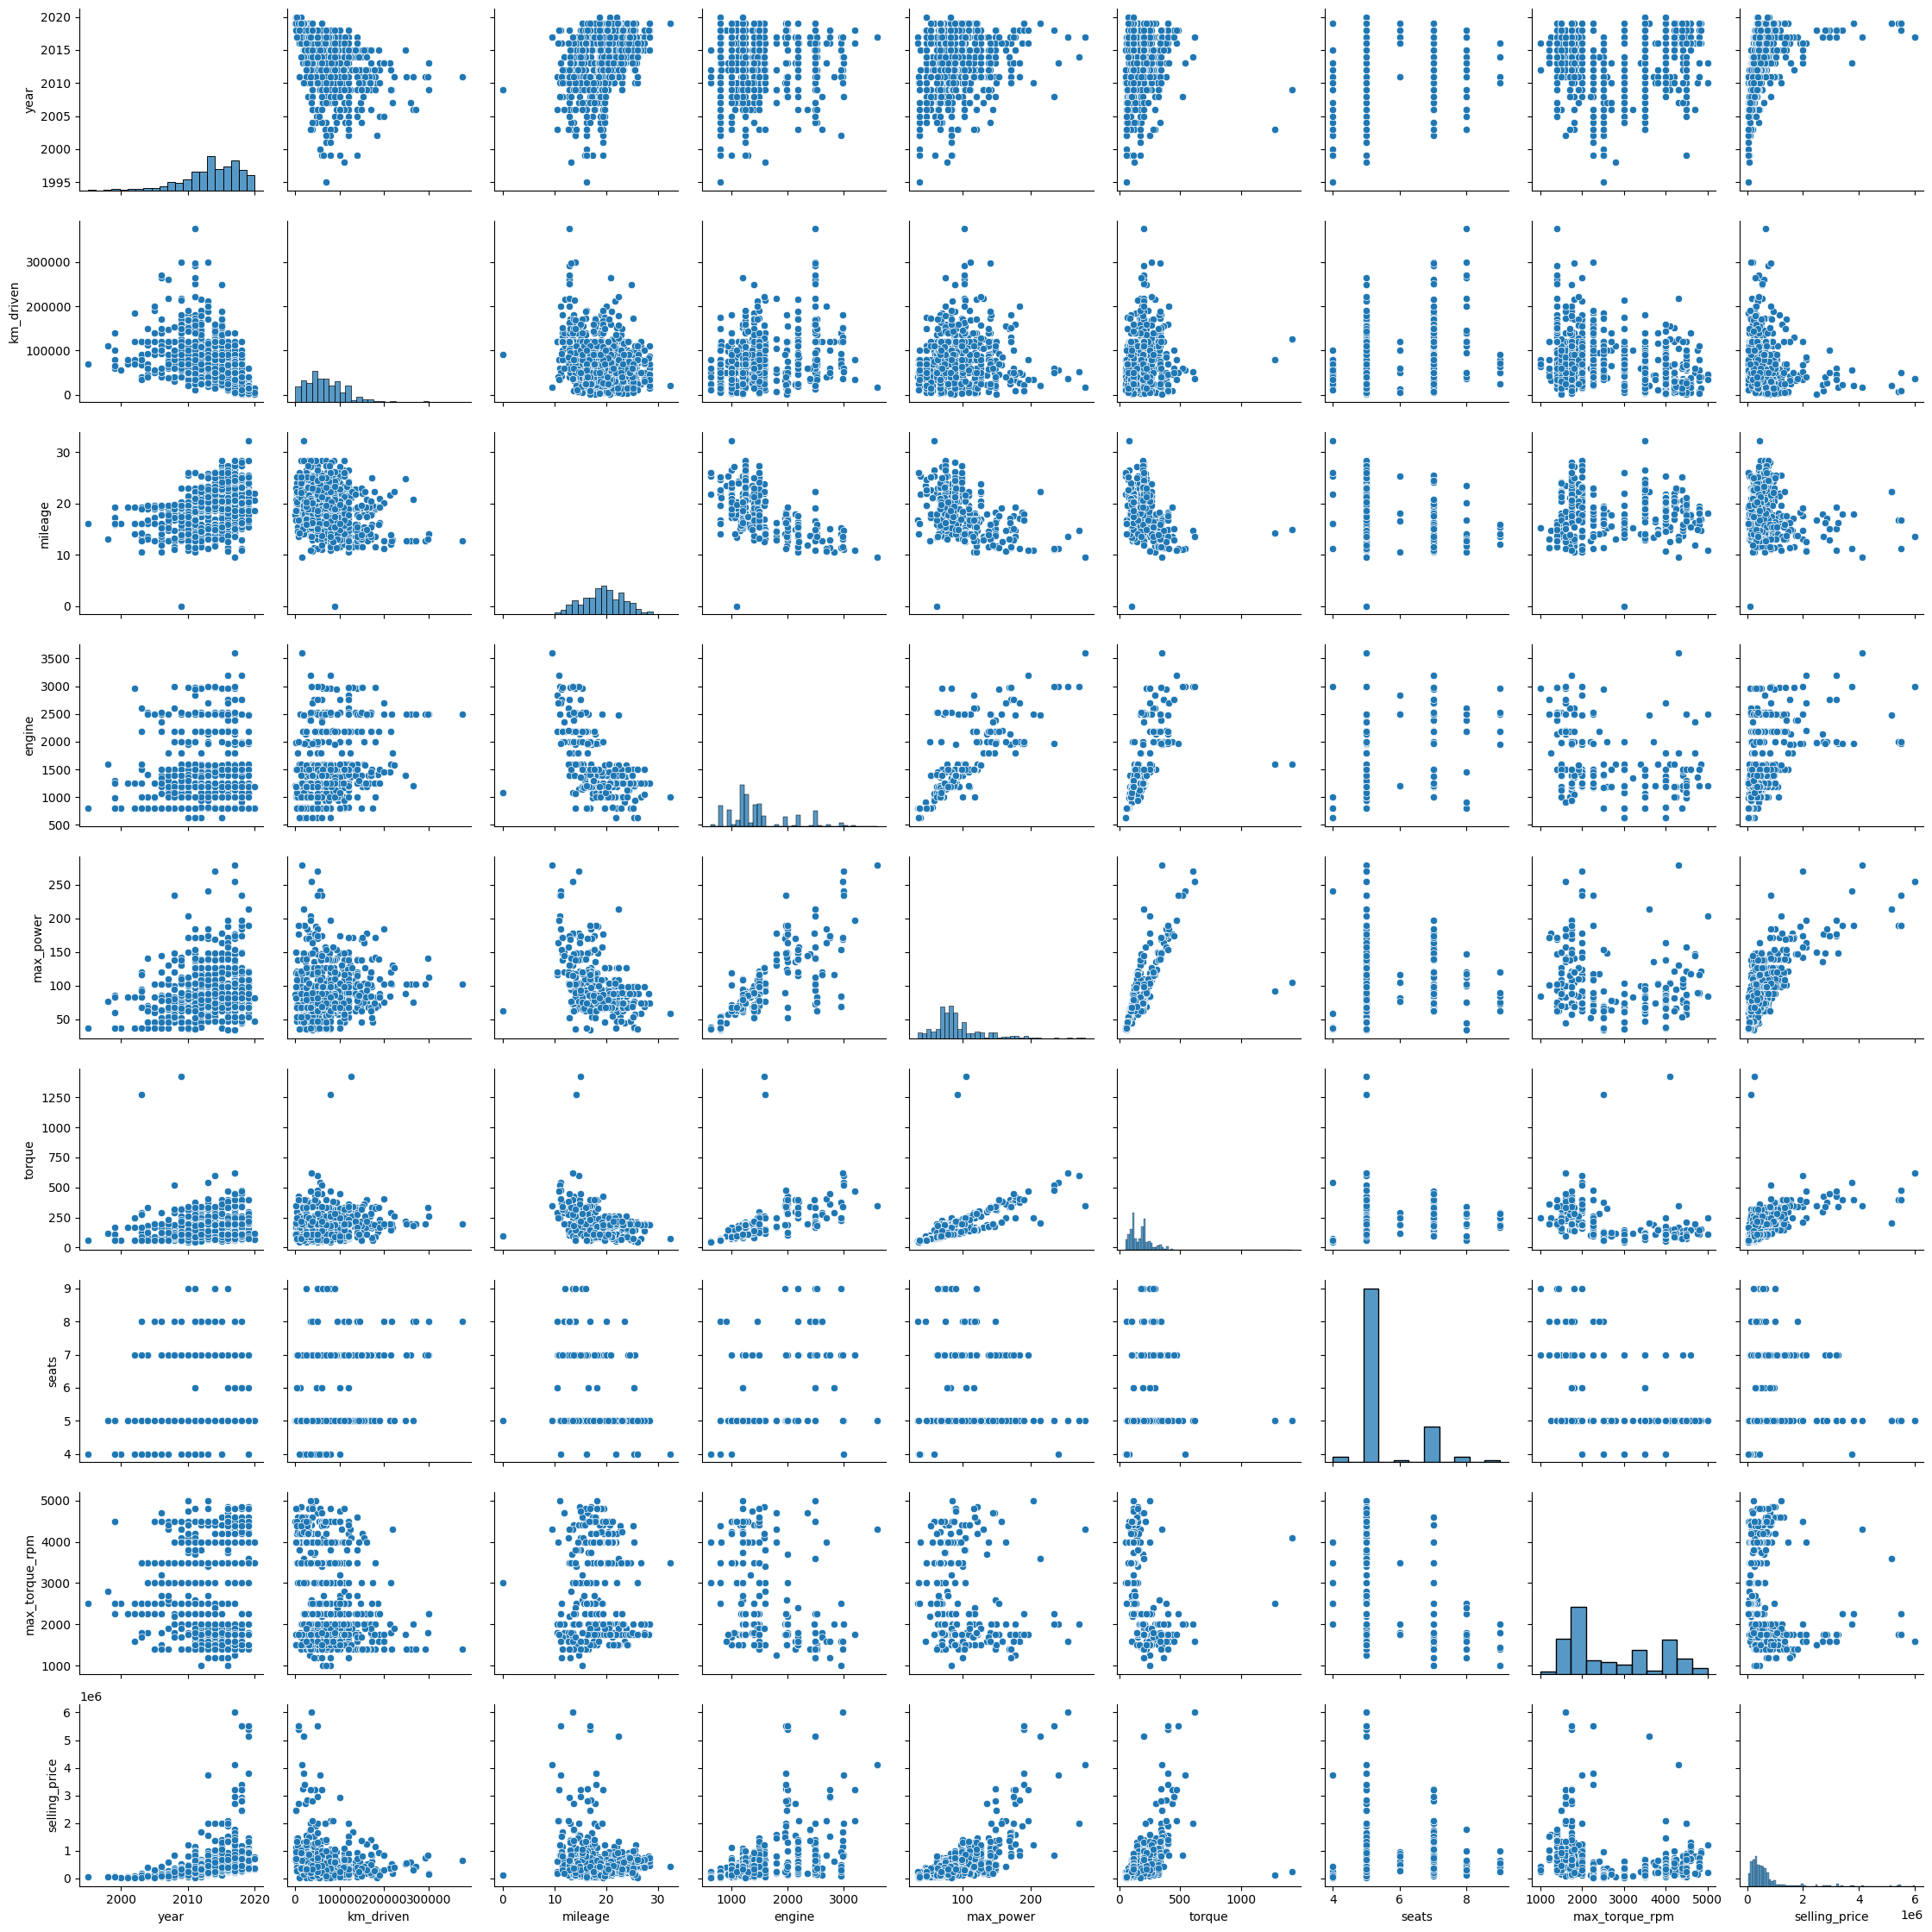

In [65]:
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm', 'selling_price']

plt.figure(figsize=(12, 10))
sns.pairplot(df_test[numeric_columns])
plt.tight_layout()
plt.show()

Совокупности +- похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [68]:
corr = df_train[numeric_columns].corr()
corr

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000  -0.368966  0.341334  0.002819   0.156858  0.048262   
km_driven      -0.368966   1.000000 -0.182086  0.229766   0.024588  0.106602   
mileage         0.341334  -0.182086  1.000000 -0.572893  -0.373390 -0.226219   
engine          0.002819   0.229766 -0.572893  1.000000   0.681117  0.566066   
max_power       0.156858   0.024588 -0.373390  0.681117   1.000000  0.616197   
torque          0.048262   0.106602 -0.226219  0.566066   0.616197  1.000000   
seats           0.041178   0.192328 -0.451059  0.652172   0.244112  0.298097   
max_torque_rpm  0.015268  -0.236130 -0.007120 -0.467843  -0.268765 -0.388871   
selling_price   0.427279  -0.164828 -0.104769  0.447672   0.692814  0.433124   

                   seats  max_torque_rpm  selling_price  
year            0.041178        0.015268       0.427279  
km_driven       0.192328       -0.236130      -0.164828  
mileage        -0.451059       -0.007120      -0.104769  
engine          0.652172       -0.467843       0.447672  
max_power       0.244112       -0.268765       0.692814  
torque          0.298097       -0.388871       0.433124  
seats           1.000000       -0.340589       0.149953  
max_torque_rpm -0.340589        1.000000      -0.241353  
selling_price   0.149953       -0.241353       1.000000

<Axes: >

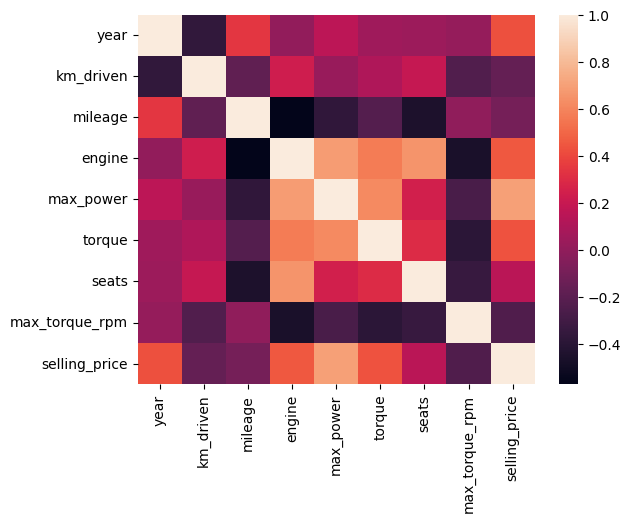

In [69]:
sns.heatmap(corr)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Наименее скореллированы engine и year

2) Довольно сильная положительная линейная зависимость наблюдается между max_power и engine

3) Не слишком сильная корелляция для такого вывода, но она есть

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [74]:
def spearman_correlation(df_train, numeric_columns):
    spearman_matrix = np.zeros((len(numeric_columns), len(numeric_columns)))

    for i, col1 in enumerate(numeric_columns):
        for j, col2 in enumerate(numeric_columns):
            x_ranks = np.argsort(np.argsort(df_train[col1]))
            y_ranks = np.argsort(np.argsort(df_train[col2]))

            diff = x_ranks - y_ranks

            n = len(df_train[col1])
            correlation = 1 - (6 * np.sum(diff**2)) / (n * (n**2 - 1))

            spearman_matrix[i, j] = correlation

    return spearman_matrix


In [77]:
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm', 'selling_price']

spearman_matrix = spearman_correlation(df_train, numeric_columns)
spearman_matrix

array([[ 1.        , -0.56621813,  0.34295975, -0.03467668,  0.16687537,
         0.10394279,  0.05048545, -0.0465779 ,  0.7050605 ],
       [-0.56621813,  1.        , -0.19768735,  0.30341074,  0.04046356,
         0.24211079,  0.10545427, -0.27993969, -0.29569865],
       [ 0.34295975, -0.19768735,  1.        , -0.42898709, -0.30868377,
        -0.16295087, -0.30722079,  0.03110222,  0.02616373],
       [-0.03467668,  0.30341074, -0.42898709,  1.        ,  0.71152631,
         0.84011133,  0.36166019, -0.58158787,  0.46186566],
       [ 0.16687537,  0.04046356, -0.30868377,  0.71152631,  1.        ,
         0.7788051 ,  0.20068732, -0.36868629,  0.61235243],
       [ 0.10394279,  0.24211079, -0.16295087,  0.84011133,  0.7788051 ,
         1.        ,  0.286431  , -0.74695159,  0.5815615 ],
       [ 0.05048545,  0.10545427, -0.30722079,  0.36166019,  0.20068732,
         0.286431  ,  1.        , -0.27318342,  0.22067013],
       [-0.0465779 , -0.27993969,  0.03110222, -0.58158787, -0

<Axes: >

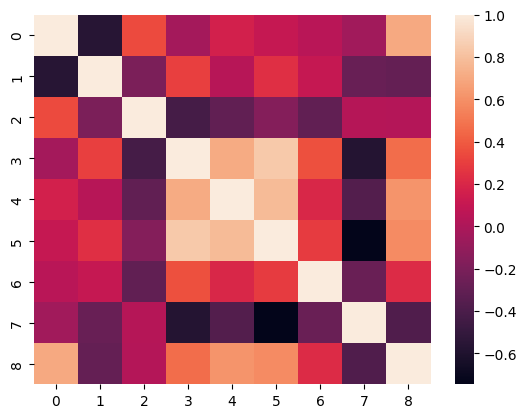

In [84]:
sns.heatmap(spearman_matrix)

In [78]:
scipy_matrix = df_train[numeric_columns].corr(method='spearman')
scipy_matrix

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000  -0.569659  0.346132 -0.038056   0.165798  0.102603   
km_driven      -0.569659   1.000000 -0.198466  0.304504   0.040919  0.242934   
mileage         0.346132  -0.198466  1.000000 -0.429871  -0.308824 -0.162381   
engine         -0.038056   0.304504 -0.429871  1.000000   0.713113  0.842430   
max_power       0.165798   0.040919 -0.308824  0.713113   1.000000  0.779600   
torque          0.102603   0.242934 -0.162381  0.842430   0.779600  1.000000   
seats           0.048291   0.195317 -0.435458  0.527716   0.304857  0.438233   
max_torque_rpm -0.044327  -0.280669  0.032728 -0.587509  -0.371341 -0.751346   
selling_price   0.707123  -0.295665  0.026186  0.463577   0.612258  0.582414   

                   seats  max_torque_rpm  selling_price  
year            0.048291       -0.044327       0.707123  
km_driven       0.195317       -0.280669      -0.295665  
mileage        -0.435458        0.032728       0.026186  
engine          0.527716       -0.587509       0.463577  
max_power       0.304857       -0.371341       0.612258  
torque          0.438233       -0.751346       0.582414  
seats           1.000000       -0.441056       0.317605  
max_torque_rpm -0.441056        1.000000      -0.386646  
selling_price   0.317605       -0.386646       1.000000

<Axes: >

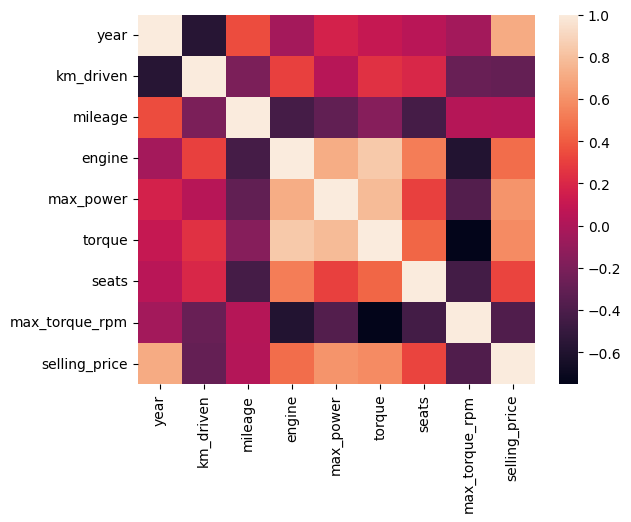

In [85]:
sns.heatmap(scipy_matrix)

In [80]:
np.abs(spearman_matrix - scipy_matrix.values).max()

0.16787228646910313

In [81]:
import phik

In [82]:
phik_matrix = df_train[numeric_columns].phik_matrix()

interval columns not set, guessing: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm', 'selling_price']


In [83]:
phik_matrix

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000   0.081574  0.279253  0.213156   0.381639  0.096307   
km_driven       0.081574   1.000000  0.081625  0.210747   0.000000  0.000000   
mileage         0.279253   0.081625  1.000000  0.588155   0.687235  0.204598   
engine          0.213156   0.210747  0.588155  1.000000   0.720780  0.466097   
max_power       0.381639   0.000000  0.687235  0.720780   1.000000  0.577329   
torque          0.096307   0.000000  0.204598  0.466097   0.577329  1.000000   
seats           0.288178   0.096223  0.679979  0.603400   0.569587  0.206073   
max_torque_rpm  0.161539   0.019515  0.395725  0.639142   0.292410  0.743809   
selling_price   0.219841   0.000000  0.649768  0.503682   0.872166  0.423431   

                   seats  max_torque_rpm  selling_price  
year            0.288178        0.161539       0.219841  
km_driven       0.096223        0.019515       0.000000  
mileage         0.679979        0.395725       0.649768  
engine          0.603400        0.639142       0.503682  
max_power       0.569587        0.292410       0.872166  
torque          0.206073        0.743809       0.423431  
seats           1.000000        0.435997       0.196447  
max_torque_rpm  0.435997        1.000000       0.177211  
selling_price   0.196447        0.177211       1.000000

Сильная зависимость между max_power и mileage, а также между max_power и engine. Максимальная - между max_power и selling_price

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

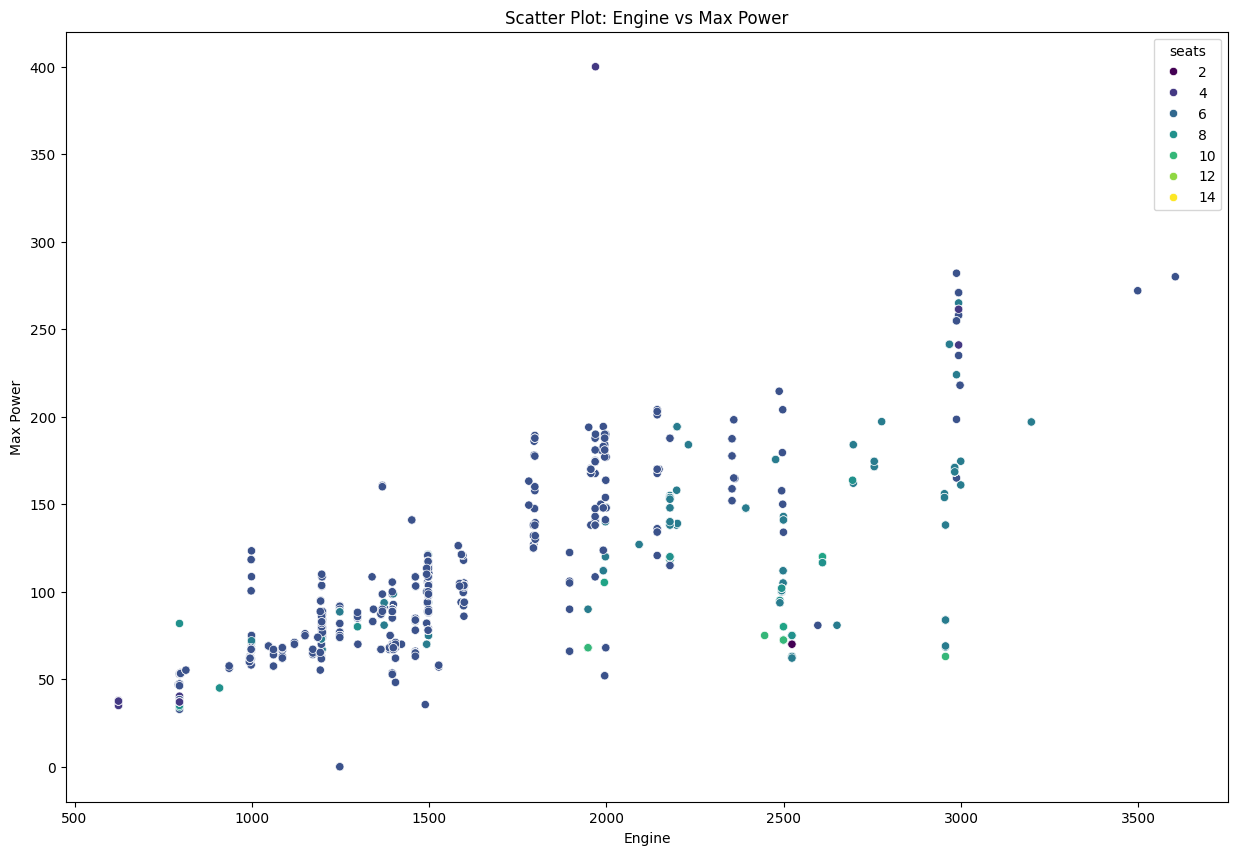

In [86]:
# такая корелляция тоже есть

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_train, x='engine', y='max_power', hue='seats', palette='viridis')
plt.title('Scatter Plot: Engine vs Max Power')
plt.xlabel('Engine')
plt.ylabel('Max Power')
plt.show()


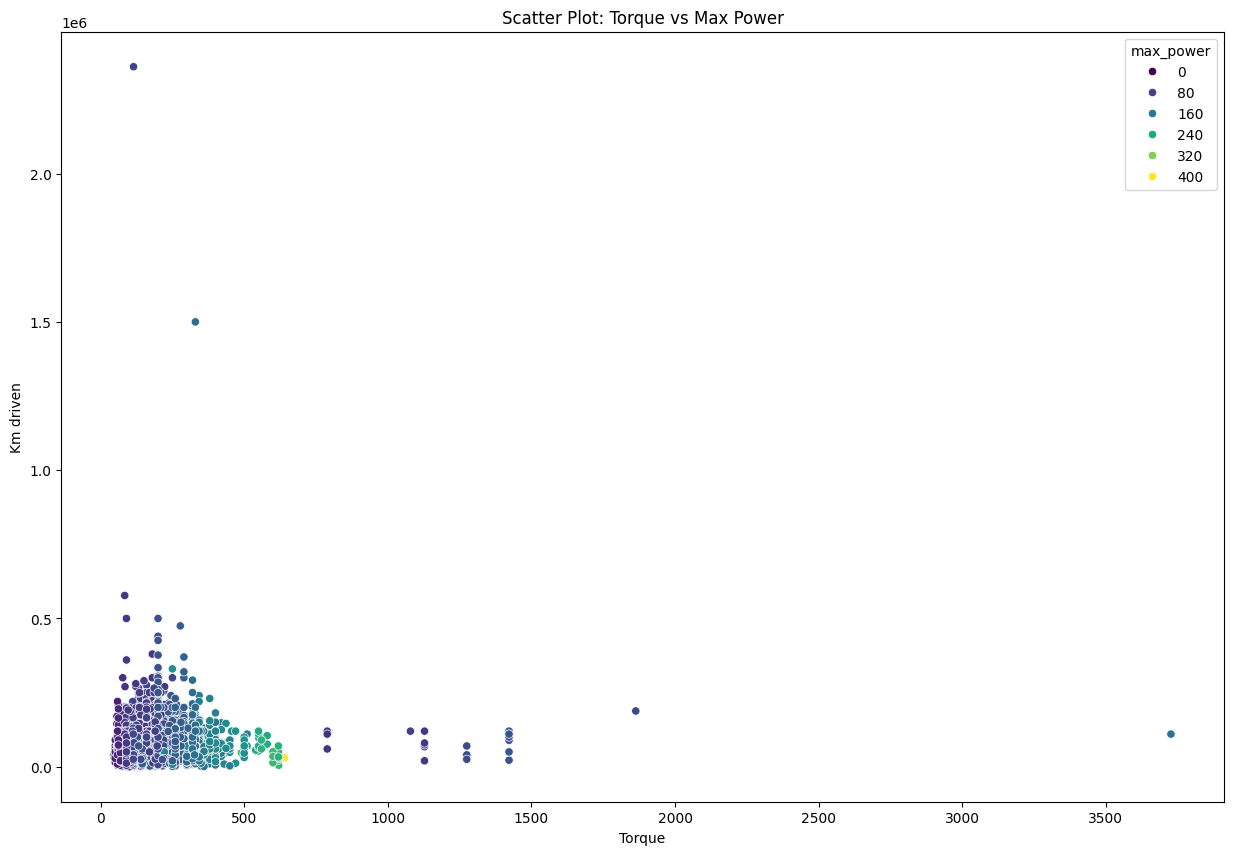

In [87]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_train, x='torque', y='km_driven', hue='max_power', palette='viridis')
plt.title('Scatter Plot: Torque vs Max Power')
plt.xlabel('Torque')
plt.ylabel('Km driven')
plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [89]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [91]:
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

df_train_copy = df_train_copy[numeric_columns]

In [92]:
df_train_copy

year  km_driven  mileage  engine  max_power      torque  seats  \
0     2014     145500    23.40    1248      74.00  190.000000      5   
1     2014     120000    21.14    1498     103.52  250.000000      5   
2     2010     127000    23.00    1396      90.00  219.668960      5   
3     2007     120000    16.10    1298      88.20  112.776475      5   
4     2017      45000    20.14    1197      81.86  113.750000      5   
...    ...        ...      ...     ...        ...         ...    ...   
6992  2008     191000    17.92    1086      62.10   96.100000      5   
6993  2013      50000    18.90     998      67.10   90.000000      5   
6994  2013     110000    18.50    1197      82.85  113.700000      5   
6995  2007     119000    16.80    1493     110.00  235.359600      5   
6996  2009     120000    19.30    1248      73.90  190.000000      5   

      max_torque_rpm  
0             2000.0  
1             1500.0  
2             2000.0  
3             4500.0  
4             4000.0  
...              ...  
6992          3000.0  
6993          3500.0  
6994          4000.0  
6995          1900.0  
6996          2000.0  

[5840 rows x 8 columns]

In [207]:
df_test_copy = df_test_copy[numeric_columns]

In [208]:
y_train = df_train['selling_price']
X_train = df_train_copy

In [ ]:
# assert X_train.shape == (5840, 6)

In [209]:
y_test = df_test['selling_price']
X_test = df_test_copy

In [ ]:
# assert X_test.shape == (1000, 6)

In [210]:
X_test

year  km_driven  mileage  engine  max_power     torque  seats  \
0    2010     168000    14.00    2498     112.00  260.00000      7   
1    2017      25000    21.50    1497     108.50  260.00000      5   
2    2007     218463    12.90    1799     130.00  172.00000      5   
3    2015     173000    25.10    1498      98.60  200.00000      5   
4    2011      70000    16.50    1172      65.00   96.00000      5   
..    ...        ...      ...     ...        ...        ...    ...   
995  2008     100000    19.81    1086      68.05   99.04000      5   
996  2017      50000    18.60    1197      81.83  114.70000      5   
997  2009      40000    23.00    1396      90.00  219.66896      5   
998  2012      25000    20.36    1197      78.90  111.80000      5   
999  2016     110000    26.00    1498      98.60  200.00000      5   

     max_torque_rpm  
0            2250.0  
1            1500.0  
2            4300.0  
3            1750.0  
4            2250.0  
..              ...  
995          4500.0  
996          4000.0  
997          2250.0  
998          4000.0  
999          1750.0  

[1000 rows x 8 columns]

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


In [212]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [213]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [214]:
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MSE:", MSE(y_train, y_train_pred))
print("Test MSE:", MSE(y_test, y_test_pred))

Train R2: 0.5989923612975898
Test R2: 0.5959757328100663
Train MSE: 114944163226.47859
Test MSE: 232244685951.67047


Все не так плохо). R2 говорит о том, что модель норм. Но, коннчно, можно улучшить

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [215]:
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)

    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - y_mean)**2)

    r2 = 1 - (ss_res / ss_tot)
    return r2

In [216]:
r2 = r2_score(y_train, y_train_pred)
r2

0.5989923612975898

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

SSres - сумма квадратов остатков, которая вычисляется как:
​$$ SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


SStot - общая сумма квадратов:

$$ SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

Где:

- y_i — наблюдаемое значение зависимой переменной.
- ŷ_i — предсказанное значение зависимой переменной.
- n — количество наблюдений.
- ȳ — среднее значение зависимой переменной.


### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?


$$
\text{adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$$

Где:
- n — количество наблюдений в наборе данных,
- p — количество независимых переменных в модели,
- R^2 — обычный коэффициент детерминации.

In [217]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [218]:
adjusted_r2(r2, X_train.shape[0], p=X_train.shape[1])

0.5984421878951512

Используется, когда нужно сравнить модели с разным количеством независимых переменных.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

print(f'MSE = {MSE(y_test, pred)}')
print(f'RMSE = {MSE(y_test, pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, pred)}')

MSE = 232244685951.67026
RMSE = 481917.7169929222
R2 = 0.5959757328100668


Модель показала такой же результат. Улучшение очень незначительное

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [220]:
model.coef_

array([162548.00792228, -49351.30262333,   -713.69436035,  24145.82562982,
       318345.60482685,   7583.90638552, -31440.86684474, -54259.65857288])

In [221]:
pd.DataFrame(model.coef_, columns=['𝛽𝑖'], index=X_train.columns).abs().sort_values(by='𝛽𝑖', ascending=False)

𝛽𝑖
max_power       318345.604827
year            162548.007922
max_torque_rpm   54259.658573
km_driven        49351.302623
seats            31440.866845
engine           24145.825630
torque            7583.906386
mileage            713.694360

Наиболее инфомативный - max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [222]:
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

print(f'MSE = {MSE(y_test, lasso_pred)}')
print(f'RMSE = {MSE(y_test, lasso_pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, lasso_pred)}')

MSE = 232245367580.73685
RMSE = 481918.42419722537
R2 = 0.5959745470146502


Тут метрики качества незначительно ухудшились

In [223]:
pd.DataFrame(lasso_model.coef_, columns=['𝛽𝑖'], index=X_train.columns).abs().sort_values(by='𝛽𝑖', ascending=False)

𝛽𝑖
max_power       318347.228233
year            162546.143320
max_torque_rpm   54257.861919
km_driven        49350.327301
seats            31437.051434
engine           24143.831118
torque            7583.175707
mileage            710.978329

Коэффициенты не занулились. Параметр
α по дефолту очень маленький, поэтому регуляризация будет слишком слабой, чтобы занулить коэффициенты.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [224]:
from sklearn.model_selection import GridSearchCV

In [229]:
parameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10_000, 50_000, 100_000],
    'fit_intercept': [True, False]
}

lasso = Lasso()

grid_search = GridSearchCV(lasso, parameters, n_jobs=-1, verbose=True, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                   50000, 100000],
                         'fit_intercept': [True, False]},
             scoring='r2', verbose=True)

alpha: список значений для коэффициента регуляризации. fit_intercept - нужно ли модели включать свободный член в регрессионную модель

In [230]:
grid_search.best_params_

{'alpha': 10000, 'fit_intercept': True}

In [231]:
grid_search.best_estimator_.coef_

array([153883.07832587, -39355.04086413,      0.        ,      0.        ,
       325566.24800897,   2071.20659861,  -3473.22134996, -43735.92291442])

In [232]:
pd.DataFrame(grid_search.best_estimator_.coef_, columns=['𝛽𝑖'], index=X_train.columns).abs().sort_values(by='𝛽𝑖', ascending=False)

𝛽𝑖
max_power       325566.248009
year            153883.078326
max_torque_rpm   43735.922914
km_driven        39355.040864
seats             3473.221350
torque            2071.206599
mileage              0.000000
engine               0.000000

Занулились

In [233]:
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test.values)

print(f'MSE = {MSE(y_test, y_pred)}')
print(f'RMSE = {MSE(y_test, y_pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, y_pred)}')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
MSE = 232244686121.52905
RMSE = 481917.7171691544
R2 = 0.595975732514572


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [138]:
from sklearn.linear_model import ElasticNet

In [237]:
parameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10_000, 50_000, 100_000],
    'fit_intercept': [True, False],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, parameters, n_jobs=-1, verbose=True, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                   50000, 100000],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='r2', verbose=True)

In [238]:
grid_search.best_params_

{'alpha': 10000, 'fit_intercept': True, 'l1_ratio': 1}

l1_ratio: Этот параметр контролирует баланс между L1 (Lasso) и L2 (Ridge)

In [239]:
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test.values)

print(f'MSE = {MSE(y_test, y_pred)}')
print(f'RMSE = {MSE(y_test, y_pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, y_pred)}')

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
MSE = 232244686121.52905
RMSE = 481917.7171691544
R2 = 0.595975732514572


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [240]:
df_train['name'] = df_train['name'].str.split(' ').str[0]

<ipython-input-240-5f699712cd65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['name'] = df_train['name'].str.split(' ').str[0]


In [241]:
category_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [242]:
X_train_cat = df_train[category_cols]

In [244]:
assert X_train_cat.shape == (5840, 6)

In [245]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

In [246]:
df_test['name'] = df_test['name'].str.split(' ').str[0]

In [247]:
X_test_cat = df_test[category_cols]

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [251]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat_encoded = pd.get_dummies(X_train_cat, columns=category_cols, drop_first=True)

In [254]:
X_train_cat_encoded.shape

(5840, 47)

In [252]:
X_test_cat_encoded = pd.get_dummies(X_test_cat, columns=category_cols, drop_first=True)

In [255]:
X_test_cat_encoded.shape

(1000, 39)

In [257]:
common = list(set(X_train_cat_encoded.columns).intersection(set(X_test_cat_encoded.columns)))
X_test_cat_encoded = X_test_cat_encoded[common]
X_train_cat_encoded = X_train_cat_encoded[common]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

Желательно не допускать такой смитуации со столбцами)). Удаляем один, чтобы не было линейной зависимости

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [259]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10_000, 50_000, 100_000],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr'],
}



grid_search = GridSearchCV(Ridge(), parameters, n_jobs=-1, verbose=True, cv=10, scoring=['r2'], refit='r2')
grid_search.fit(X_train_cat_encoded, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000,
                                   50000, 100000],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr']},
             refit='r2', scoring=['r2'], verbose=True)

In [260]:
grid_search.fit(X_train_cat_encoded, y_train)
y_pred = grid_search.predict(X_test_cat_encoded.values)

print(f'MSE = {MSE(y_test, y_pred)}')
print(f'RMSE = {MSE(y_test, y_pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, y_pred)}')

Fitting 10 folds for each of 80 candidates, totalling 800 fits
MSE = 176857168469.56256
RMSE = 420543.8960079703
R2 = 0.6923305797271453


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [261]:
import pickle

In [262]:
with open('model.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Наверняка это кот Сабрины